# Homework 6
12110418 庄子鲲
### Problem 1
Using Python and Numpy, write a class named LinearRegression, which implements the linear regression model. For more details, it should have__init__() method, loss() method to compute the MSE loss, gradient() method to compute the gradient of the loss function with respect to learnable parameters, batch_update() method for iteratively solving the learnable parameters with batch update,stochastic_update() method for iteratively solving the learnable parameters with stochastic online update, preprocess_data() method for necessary data preprocessing,train() method for training the linear regression model, and predict() method for predicting the target for a given input.

1. Create a linear regression model:
$$
y(x)=w_0+\sum_{i=1}^{j}w_ix_i
$$
2. Define the MSE loss:
$$
l(\mathbf{w})=\frac{1}{N}\sum_{n=1}^{N}[t^{(n)}-y(\mathbf{x}^{(n)})]^2
$$
3. Batch updates:
$$
\mathbf{w}\leftarrow{\mathbf{w}+2\frac{\lambda}{N}\sum_{n=1}^{N}(t^{(n)}-y(\mathbf{x}^{(n)}))
\begin{bmatrix}
1\\
x^{(n)}_1\\
\vdots\\
x^{(n)}_j
\end{bmatrix}}
$$
4. Stochastic updates:

    for i=1 to N do:
$$
\mathbf{w}\leftarrow{\mathbf{w}+2\frac{\lambda}{N}(t^{(n)}-y(\mathbf{x}^{(n)}))
\begin{bmatrix}
1\\
x^{(n)}_1\\
\vdots\\
x^{(n)}_j
\end{bmatrix}}
$$
5. Use specific training method to train the model for n times, or until the loss<0.01.
6. Predict the output with inputs by the trained model.


In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

# Define the class of linear regression
class LinearRegression:
    # Initialize the class, maximum loop is 200, learning rate is 0.08
    def __init__(self, X, y, loop=200, lnrate=0.08):
        self.X = X
        self.preprocess_data() # preprocess the data
        self.y = y
        self.lnrate = lnrate
        self.w = np.random.rand(self.X.shape[1]) # initialize the weights
        #self.y_pred=np.sum(self.w*self.X, axis=1) # initialize the prediction
        self.loop=loop
        
    # Define the loss function
    def loss(self):
        self.y_pred=np.sum(self.w*self.X, axis=1)
        return np.mean((self.y-self.y_pred)**2)
    
    # Define the gradient function
    def gradient(self):
        self.y_pred=np.sum(self.w*self.X, axis=1)
        grad = np.zeros(self.X.shape) # initialize the gradient
        l=len(self.y)
        # calculate the gradient
        for i in range(l):
            grad[i,:]=(-2/l)*(self.y[i]-self.y_pred[i])*self.X[i,:]
        return grad
    
    
    # Define the batch update function
    def batch_update(self):
        g=self.gradient()
        g=g.sum(axis=0) # add up the gradient
        self.w = self.w - self.lnrate*g # update the weights
        
    # Define the stochastic update function
    def stochastic_update(self):
        for i in range(len(self.X)):
            g=self.gradient() # calculate the gradient
            g=g[i,:] # select the gradient of the ith sample
            self.w = self.w - self.lnrate*g # update the weights
    
    # Define the preprocess function
    def preprocess_data(self):
        self.X = np.insert(self.X, 0, 1, axis=1) # insert 1 at the beginning of each sample
        
    # Define the train function, mode=0 is batch update, mode=1 is stochastic update
    def train(self,mode):
        if mode==0:
            for _ in range(self.loop):
                self.batch_update() # update the weights by batch
                if self.loss() < 0.01:
                    break
            return self.w
        else:
            for _ in range(self.loop):
                self.stochastic_update() # update the weights by stochastic
                if self.loss() < 0.01:
                    break
            return self.w
        
    # Define the predict function
    def predict(self,X):
        X = np.insert(X, 0, 1, axis=1) # preprocess the data
        return np.sum(self.w*X, axis=1) # predict the y

Test the model with 2D inputs, where
$$
y=2x_1+5x_2+3+r
$$
and $r$ is in $[-1,1]$

1. Use the batch updates

The loss value is:  0.3669453233374434
The weights are:  [3.11450477 2.15936947 4.66999295]


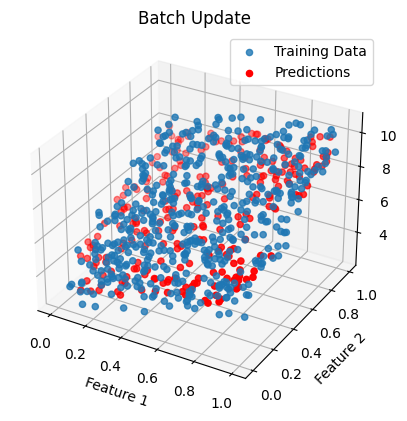

In [2]:
# Generate random two-dimensional input samples
np.random.seed(0)
X_batch_train = np.random.rand(500, 2)
y_batch_train = 2 * X_batch_train[:, 0] + 5 * X_batch_train[:, 1] + np.random.uniform(-1, 1, 500) + 3

# Create a linear regression model and preprocess the data
model_batch = LinearRegression(X_batch_train, y_batch_train)

# Train the model
model_batch.train(0)

print("The loss value is: ",model_batch.loss())

print("The weights are: ",model_batch.w)

# Create test data
pX_batch_train = np.random.rand(250, 2)

# Use the model for predictions
predictions_batch = model_batch.predict(pX_batch_train)

# Create a three-dimensional plot window
fig_batch = plt.figure()
ax_batch = fig_batch.add_subplot(111, projection='3d')

# Plot the scatter plot of training data
ax_batch.scatter(X_batch_train[:, 0], X_batch_train[:, 1], y_batch_train, label='Training Data', marker='o', alpha=0.8)

# Plot the scatter plot of prediction data
ax_batch.scatter(pX_batch_train[:, 0], pX_batch_train[:, 1], predictions_batch, label='Predictions', marker='o', color='red')

# Set axis labels
ax_batch.set_xlabel('Feature 1')
ax_batch.set_ylabel('Feature 2')
ax_batch.set_zlabel('Output')

# Show the legend
ax_batch.legend()

# Show the title
ax_batch.set_title('Batch Update')

# Show the plot
plt.show()

2. Use the stochastic updates

In [3]:
# Generate random two-dimensional input samples
np.random.seed(0)
X_stochastic_train = np.random.rand(500, 2)
y_stochastic_train = 2 * X_stochastic_train[:, 0] + 5 * X_stochastic_train[:, 1] + np.random.uniform(-1, 1, 500) + 3

# Create a linear regression model and preprocess the data
model_stochastic = LinearRegression(X_stochastic_train, y_stochastic_train)

# Train the model
model_stochastic.train(1)

print("The loss value is: ",model_stochastic.loss())

print("The weights are: ", model_stochastic.w)

# Create test data
pX_stochastic_train = np.random.rand(250, 2)

# Use the model for predictions
predictions_stochastic = model_stochastic.predict(pX_stochastic_train)

# Create a three-dimensional plot window
fig_stochastic = plt.figure()
ax_stochastic = fig_stochastic.add_subplot(111, projection='3d')

# Plot the scatter plot of training data
ax_stochastic.scatter(X_stochastic_train[:, 0], X_stochastic_train[:, 1], y_stochastic_train, label='Training Data', marker='o', alpha=0.8)

# Plot the scatter plot of prediction data
ax_stochastic.scatter(pX_stochastic_train[:, 0], pX_stochastic_train[:, 1], predictions_stochastic, label='Predictions', marker='o', color='red')

# Set axis labels
ax_stochastic.set_xlabel('Feature 1')
ax_stochastic.set_ylabel('Feature 2')
ax_stochastic.set_zlabel('Output')

# Show the legend
ax_stochastic.legend()

# Show the title
ax_stochastic.set_title('Stochastic Update')

# Show the plot
plt.show()

KeyboardInterrupt: 